<FreqDist with 1 samples and 2 outcomes>
2
[('which', 1)]
dict_keys(['I', 'like', 'a', 'tree', 'which', 'endure', 'the', 'cat', 'who', 'alive', 'in', 'really', 'run', 'away'])
[[0 2 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]]
['I', 'like', 'a', 'tree', 'which', 'endure', 'the', 'cat', 'who', 'alive', 'in', 'really', 'run', 'away']
[('I', 'like'), ('I', 'really'), ('like', 'a'), ('a', 'tree'), ('a', 'cat'), ('tree', 'which'), ('which', 'endure'), ('endure', 'the'), ('the', 'away'), ('cat', 'who'), ('who', 'alive'), ('alive', 'in'), ('really', 'run'), ('run', 'away')]
{'weight': 2}
{'weight': 1}
dict_keys(['I'

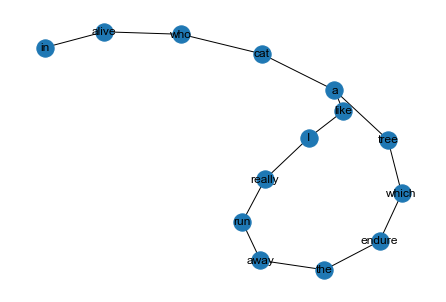

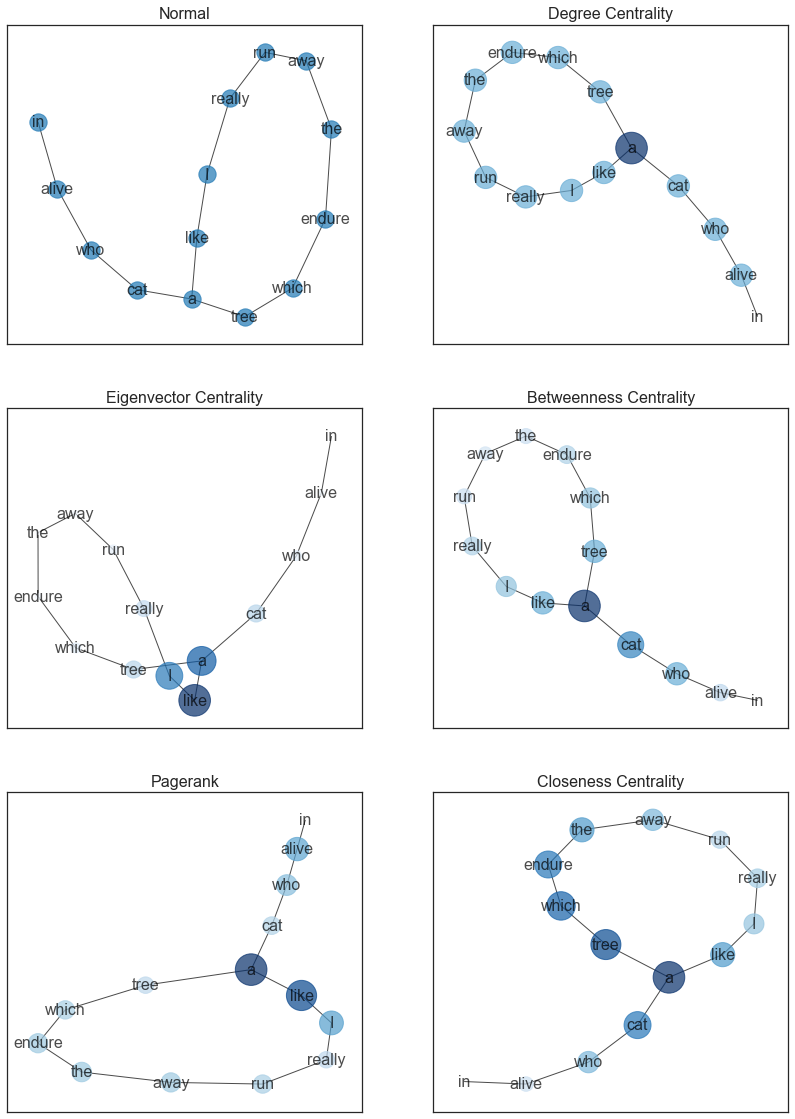

In [17]:
from nltk import ConditionalFreqDist
from nltk import word_tokenize, bigrams


sentences = ['I like a tree which endure the winter','I like a cat who alive in summer','I really run away the autumn']

# 텍스트의 문장을 엔터 /n 되어 있는 것을 제외하고. 불용어를 제외한 형태로 시리즈로 [] 안에 넣는다. 

tokens = [word_tokenize(x) for x in sentences]
bgrams = [bigrams(x) for x in tokens]

token = []
for i in bgrams : 
    token += ([x for x in i])
cfd = ConditionalFreqDist(token)
cfd.conditions()

# 해당하는 시리즈를 토큰화 한 뒤, 불용어 처리를 한다. 

# 그리고 생기는 단어별 빈도가 있는데 이것은 기존에 실행한 키워드 분석에 것을 쓴다. 

# 노드를 형성하는 걸 사람이 지정하는 방식으로 네트워크를 형성하는 방식이다. 

# 모든 시리즈(문장을 구성하는 단어)를 나열하고 메트릭스를 형성한 다음에 대응하는 갯수를 세는 방식으로 하는 것이 네트워크 분석을 하는 하나의 방법이다. 

# 어디에서 대응할지에 대한 짧은 문장을 적고 그것의 포인트를 like I 같은 것으로 둔 것이 아래의 코드이다. 

# 그렇게 하면 결과가 나온다. 

# 결론 


# 1) 텍스트의 문장을 리스트가 아닌 시리즈로 구성
# 2) 불용어 처리 
# 3) 노드의 지점은 기존에 분석한 키워드에서 가져온다.
# 4) 아래의 코드 방식으로 네트워크를 만든다. 

print(cfd['like'])

print(cfd['I']['like'])
print(cfd['tree'].most_common(1))



import numpy as np
freq_matrix = []

for i in cfd.keys() : 
    temp = []
    for j in cfd.keys() : 
        temp.append(cfd[i][j])
    freq_matrix.append(temp)
freq_matrix = np.array(freq_matrix) 

print(cfd.keys())
print(freq_matrix)

import pandas as pd

df = pd.DataFrame(freq_matrix, index = cfd.keys(), columns = cfd.keys())
df.style.background_gradient(cmap = 'coolwarm')
import networkx as nx

G = nx.from_pandas_adjacency(df)
print(G.nodes())
print(G.edges())

print(G.edges()[('I','like')])
print(G.edges()[('which','endure')])

nx.draw(G, with_labels = True)
from nltk.probability import ConditionalProbDist, MLEProbDist

cpd = ConditionalProbDist(cfd, MLEProbDist)
cpd.conditions()

prob_matrix = []
for i in cpd.keys() : 
    prob_matrix.append([cpd[i].prob(j) for j in cpd.keys()])
    
prob_matrix = np.array(prob_matrix)    
print(cpd.keys())
print(prob_matrix)

df = pd.DataFrame(prob_matrix, index=cpd.keys(), columns = cpd.keys())
df.style.background_gradient(cmap = 'Greens')

prob_G = nx.from_pandas_adjacency(df)

print(prob_G.nodes())
print(prob_G.edges())

print(G.edges()[('I','like')])
print(G.edges()[('which','endure')])

print(prob_G.edges()[('I','like')])
print(prob_G.edges()[('which','endure')])

import networkx as nx
nx.degree_centrality(G)

def get_node_size(node_values) : 
    nsize = np.array([v for v in node_values])
    nsize = 1000 * (nsize -min(nsize)) / (max(nsize) - min(nsize))  
    return nsize

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

dc = nx.degree_centrality(G).values()
ec = nx.eigenvector_centrality(G, weight = 'weight').values()
cc = nx.closeness_centrality(G, distance = 'weight').values()
bc = nx.betweenness_centrality(G).values()
pr = nx.pagerank(G).values()

plt.figure(figsize=(14,20))
plt.axis('off')

plt.subplot(321)
plt.title('Normal', fontsize = 16)
nx.draw_networkx(G, font_size=16, alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(322)
plt.title('Degree Centrality', fontsize = 16)
nx.draw_networkx(G, font_size=16, 
                 node_color=list(dc), node_size=get_node_size(dc),
                 alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(323)
plt.title('Eigenvector Centrality', fontsize = 16)
nx.draw_networkx(G, font_size=16, 
                 node_color=list(ec), node_size=get_node_size(ec),
                 alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(324)
plt.title('Betweenness Centrality', fontsize = 16)
nx.draw_networkx(G, font_size=16, 
                 node_color=list(bc), node_size=get_node_size(bc),
                 alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(325)
plt.title('Pagerank', fontsize = 16)
nx.draw_networkx(G, font_size=16, 
                 node_color=list(pr), node_size=get_node_size(pr),
                 alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(326)
plt.title('Closeness Centrality', fontsize = 16)
nx.draw_networkx(G, font_size=16, 
                 node_color=list(cc), node_size=get_node_size(cc),
                 alpha=0.7, cmap=plt.cm.Blues)

In [19]:
from nltk import ConditionalFreqDist
from nltk import word_tokenize, bigrams


sentences = ['영화평론가들이 좋아할만한 60~70년대 영화같은 적당히 촌스러운 복고스타일의 영상미와 편집.']

tokens = [word_tokenize(x) for x in sentences]
bgrams = [bigrams(x) for x in tokens]

token = []
for i in bgrams : 
    token += ([x for x in i])
cfd = ConditionalFreqDist(token)
cfd.conditions()

print(cfd['like'])

print(cfd['I']['like'])
print(cfd['tree'].most_common(1))

import numpy as np
freq_matrix = []

for i in cfd.keys() : 
    temp = []
    for j in cfd.keys() : 
        temp.append(cfd[i][j])
    freq_matrix.append(temp)
freq_matrix = np.array(freq_matrix) 

print(cfd.keys())
print(freq_matrix)

import pandas as pd

df = pd.DataFrame(freq_matrix, index = cfd.keys(), columns = cfd.keys())
df.style.background_gradient(cmap = 'coolwarm')
import networkx as nx

G = nx.from_pandas_adjacency(df)
print(G.nodes())
print(G.edges())

print(G.edges()[('I','like')])
print(G.edges()[('which','endure')])

nx.draw(G, with_labels = True)
from nltk.probability import ConditionalProbDist, MLEProbDist

cpd = ConditionalProbDist(cfd, MLEProbDist)
cpd.conditions()

prob_matrix = []
for i in cpd.keys() : 
    prob_matrix.append([cpd[i].prob(j) for j in cpd.keys()])
    
prob_matrix = np.array(prob_matrix)    
print(cpd.keys())
print(prob_matrix)

df = pd.DataFrame(prob_matrix, index=cpd.keys(), columns = cpd.keys())
df.style.background_gradient(cmap = 'Greens')

prob_G = nx.from_pandas_adjacency(df)

print(prob_G.nodes())
print(prob_G.edges())

print(G.edges()[('I','like')])
print(G.edges()[('which','endure')])

print(prob_G.edges()[('I','like')])
print(prob_G.edges()[('which','endure')])

import networkx as nx
nx.degree_centrality(G)

def get_node_size(node_values) : 
    nsize = np.array([v for v in node_values])
    nsize = 1000 * (nsize -min(nsize)) / (max(nsize) - min(nsize))  
    return nsize

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

dc = nx.degree_centrality(G).values()
ec = nx.eigenvector_centrality(G, weight = 'weight').values()
cc = nx.closeness_centrality(G, distance = 'weight').values()
bc = nx.betweenness_centrality(G).values()
pr = nx.pagerank(G).values()

plt.figure(figsize=(14,20))
plt.axis('off')

plt.subplot(321)
plt.title('Normal', fontsize = 16)
nx.draw_networkx(G, font_size=16, alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(322)
plt.title('Degree Centrality', fontsize = 16)
nx.draw_networkx(G, font_size=16, 
                 node_color=list(dc), node_size=get_node_size(dc),
                 alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(323)
plt.title('Eigenvector Centrality', fontsize = 16)
nx.draw_networkx(G, font_size=16, 
                 node_color=list(ec), node_size=get_node_size(ec),
                 alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(324)
plt.title('Betweenness Centrality', fontsize = 16)
nx.draw_networkx(G, font_size=16, 
                 node_color=list(bc), node_size=get_node_size(bc),
                 alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(325)
plt.title('Pagerank', fontsize = 16)
nx.draw_networkx(G, font_size=16, 
                 node_color=list(pr), node_size=get_node_size(pr),
                 alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(326)
plt.title('Closeness Centrality', fontsize = 16)
nx.draw_networkx(G, font_size=16, 
                 node_color=list(cc), node_size=get_node_size(cc),
                 alpha=0.7, cmap=plt.cm.Blues)

<FreqDist with 0 samples and 0 outcomes>
0
[]
dict_keys(['영화평론가들이', '좋아할만한', '60~70년대', '영화같은', '적당히', '촌스러운', '복고스타일의', '영상미와', '편집', 'like', 'I', 'tree'])
[[0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
['영화평론가들이', '좋아할만한', '60~70년대', '영화같은', '적당히', '촌스러운', '복고스타일의', '영상미와', '편집', 'like', 'I', 'tree']
[('영화평론가들이', '좋아할만한'), ('좋아할만한', '60~70년대'), ('60~70년대', '영화같은'), ('영화같은', '적당히'), ('적당히', '촌스러운'), ('촌스러운', '복고스타일의'), ('복고스타일의', '영상미와'), ('영상미와', '편집')]


KeyError: 'like'